<h1><center>Setting up the model</center></h1>

In [1]:
#Debugging finopt
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../')
import numpy as np
%matplotlib inline
import operator
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

from matplotlib import markers
from matplotlib import colors
clist = colors.cnames.keys()
mlist = markers.MarkerStyle().markers.keys()

#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, createIfAbsent, saveHDF5
from optvaeutils.viz import getName,stitchMNISTSamples
from sklearn.feature_extraction.text import TfidfTransformer
#STORAGE FOR FINAL RESULT
result   = {}

In [2]:
from optvaemodels.vae import VAE
import optvaemodels.vae_learn as VAE_learn
import optvaemodels.vae_evaluate as VAE_evaluate
import optvaemodels.vae_learn as VAE_learn
import itertools,time
from utils.misc import readPickle

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, cuDNN 4007)
/home/rahul/.local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
from datasets.load import loadDataset
import sys
sys.path.append('../../')
from optvaedatasets.load import loadDataset as LDVAE

#DATA = 'binarized_mnist'
#DATA = 'binarized-wikipedia-small'
DATA = '20newsgroups_miao'
if DATA == 'binarized_mnist':
    dataset = loadDataset(DATA)
elif 'binarized-wikipedia-small' in DATA or 'newsgroups' in DATA or 'rcv2' in DATA:
    dataset = LDVAE(DATA)
print DATA,dataset.keys()
additional_attrs        = {}
tfidf                   = TfidfTransformer(norm=None)
tfidf.fit(dataset['train'])
#Get normalized idf vectors
additional_attrs['idf'] = tfidf.idf_

20newsgroups_miao ['vocabulary', 'data_type', 'dim_observations', 'train', 'test', 'valid']


In [ ]:
#UNUSED 
"""
EP    = '10'; pl    = 2
#DONTUSE EP    = '40'; pl    = 0
rfile = '../expt/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

EP    = '280'; pl    = 2
rfile = '../expt/chkpt-20newsgroups_miao-none/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-none-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01-itype-normalizel20_01_-uid'


EP    = '380'; pl    = 0
rfile = '../expt/results-sept6/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'
"""

In [4]:
EP    = '80'; pl    = 2
rfile = '../expt/results-sept6/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

In [ ]:
EP    = '40'
rfile = '../expt/results-sept6/chkpt-binarized_mnist-none/VAE_lr-8_0e-04-ph-400-ds-50-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-none-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

In [5]:
suffix= '-EP'+EP+'-params.npz'
rfile+= suffix
pfile = rfile.split('uid')[0]+'uid-config.pkl'
params= readPickle(pfile)[0]
vae   = VAE(params, paramFile=pfile, reloadFile=rfile, additional_attrs = additional_attrs)

	<<Reloading Model>>
	<<Loading structure (../expt/results-sept6/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-config.pkl) and model (../expt/results-sept6/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP80-params.npz) / opt (../expt/results-sept6/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP80-optParams.npz) weights>>
	<<Nparameters: 2043803>>
	<<Setting idf as theano shared variable>>

/data/ml2/rahul/theanomodels/models/__init__.py:198: UserWarning: iter_ctr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:198: UserWarning: anneal found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:198: UserWarning: lr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")



	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Evaluation: Setting opt_method: ADAM, 100 steps w/ 8e-3 lr>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>
	<<# additional updates: 0>>
	<<Modifying : [q_logcov_b,q_1_b,q_logcov_W,q_0_W,q_mu_W,q_1_W,q_0_b,q_mu_b]>>
	<<Inference with dropout :0.0001>>
	<<Done creating functions for training>>
	<<_buildModel took : 85.2270 seconds>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>


<h1><center>Evaluating the Jacobian</center></h1>

In [6]:
sfile =rfile.split('-EP')[0]+'-evaluate.h5'
if os.path.exists(sfile):
    evaluate = loadHDF5(sfile)
else:
    evaluate     = VAE_evaluate.visualizeBOWModel(vae,X)
    test_results = VAE_evaluate.evaluateBound(vae, X, batch_size = params['batch_size'])
    for k in test_results:
        evaluate[k+'_eb'] = test_results[k]
    saveHDF5(sfile,evaluate)
    print 'Saved to:',sfile

meanKL=evaluate['KL'].mean(0)
KLidx= np.argsort(meanKL)
print meanKL[KLidx[-5:]],meanKL[KLidx[:5]]
print 'Most active: ',KLidx[-5:]
print 'Least active: ',KLidx[:5]

[ 0.85720384  0.94265193  0.94493502  1.25872386  1.30984199] [ 0.01039479  0.01084494  0.01090751  0.01106721  0.01161365]
Most active:  [93 75 13 68  7]
Least active:  [77 22 70 39 53]


In [7]:
z = np.random.randn(vae.params['dim_stochastic']).astype('float32')
z = np.zeros((vae.params['dim_stochastic'],)).astype('float32')
#jacob = vae.jacobian_probs(z)
jacob = vae.jacobian_logprobs(z)

<h1><center>Visualizing Jacobian</center></h1>

<matplotlib.colorbar.Colorbar instance at 0x3574c050>

/usr/local/pkg/python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


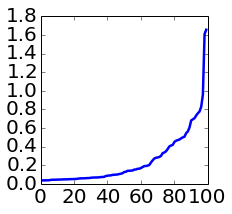

/usr/local/pkg/python/2.7/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


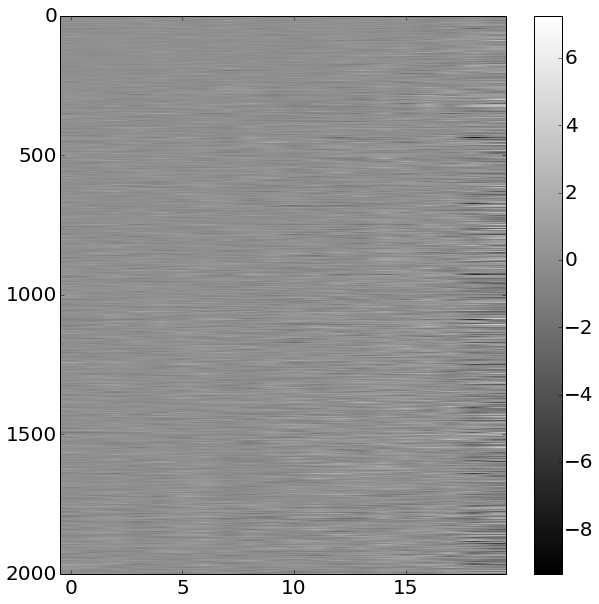

In [8]:
plt.figure(figsize=(3,3))
plt.plot(np.sort(jacob.std(0)))
idx = np.argsort(jacob.std(0))
sjacob = jacob[:,idx]
plt.figure(figsize=(10,10))
plt.imshow(sjacob[:,-20:],cmap='gray',aspect='auto')
plt.colorbar()


In [ ]:
img_jacob = sjacob[:,-20:].reshape(28,28,-1)
print img_jacob.shape

fig,axlist = plt.subplots(4,5,figsize=(15,15))
for idx in range(img_jacob.shape[-1]):
    ax = axlist.ravel()[idx]
    ax.imshow(img_jacob[:,:,idx],cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
axlist.ravel()[-1].color

<h1><center>Dimensional Analysis</center></h1>

In [11]:
def wordIdx(words,vocab):
    if type(vocab) is not list:
        vocab = vocab.tolist()
    idxlist={}
    for w in words:
        idxlist[w] = None
        if w in vocab:
            idxlist[w] = vocab.index(w)
    return idxlist

In [12]:
#wordlist = ['space','nasa','lunar','orbit','shuttle','solar','launch','moon','satellite']
#wordlist = ['muslims','worship','belief','genocide','jews','islam','christianity','atheists','religious']
wordlist  = ['rsa','cryptography','crypto','keys','pgp','licence','secure','escrow','trust']
#wordlist = ['goals','pts','teams','league','team','players','nhl','stats','min']
#wordlist = ['bush','resources','charles','austin','bill','resolution','mr','misc','piece']

result   = wordIdx(wordlist,dataset['vocabulary'])
uniqdims = {}
for w in result:
    idx = result[w]
    if idx is None:
        continue
    print w,idx #Print word and idx in vocab
    word_grads = jacob[idx]
    sorted_dims= np.argsort(word_grads)
    for dim in sorted_dims[-5:].tolist():
        if dim not in uniqdims:
            uniqdims[dim] = 1
        else:
            uniqdims[dim]+= 1
    print np.sort(sorted_dims[-5:])

sorted_x = sorted(uniqdims.items(), key=operator.itemgetter(1))
print 'Most relevant dimensions (dim,count): ',sorted_x[-5:]

trust 1052
[15 51 74 84 92]
cryptography 1655
[18 41 44 93 99]
keys 461
[15 18 75 93 99]
rsa 1780
[18 28 68 80 93]
crypto 1553
[56 74 75 93 99]
pgp 1231
[18 51 56 87 99]
escrow 1045
[56 80 91 93 99]
secure 913
[18 44 56 79 99]
Most relevant dimensions (dim,count):  [(51, 2), (56, 4), (18, 5), (93, 5), (99, 6)]


In [ ]:
plt.imshow(np.corrcoef(jacob.T),cmap='gray')

### ANALYSIS 1

In [ ]:
K = 10
spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack',affinity="nearest_neighbors")
aggclust = cluster.AgglomerativeClustering(n_clusters=K, affinity='cosine',linkage='average')
affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-30)

algorithm = spectral
algorithm.fit(jacob.T)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    

idx_cluster = np.argsort(y_pred)
print np.unique(y_pred)
jacob_perm  = jacob[:,idx_cluster]
plt.imshow(np.corrcoef(jacob_perm.T),cmap='gray')

In [ ]:
idx_label_pairs = zip(np.arange(len(y_pred)),y_pred)
idx_label_pairs.sort(key=lambda a: a[1])
print 'Sorted dim_idx/label pairs',idx_label_pairs
cluster_viz = OrderedDict()
for k in np.unique(y_pred):
    idxlist = []
    for idx,lab in idx_label_pairs:
        if lab==k:
            idxlist.append(idx)
    print k,idxlist
    z_start = np.random.randn(100,vae.params['dim_stochastic'])
    z_end   = np.random.randn(100,vae.params['dim_stochastic'])
    z_start[:,idxlist] = -2
    z_end[:,idxlist]   = 2
    cluster_viz[k] = OrderedDict()
    for alpha in np.linspace(0,1,10):
        z_effective = z_start*alpha + (1.-alpha)*z_end
        recons = [dataset['vocabulary'][w_idx] for w_idx in np.argsort(vae.reconstruct(z_effective.astype('float32')).mean(0))[-5:]]
        cluster_viz[k][alpha] = recons
    print 'Done'

In [ ]:
for k in cluster_viz:
    print 'Cluster: ',k
    word_slider = cluster_viz[k]
    for alpha in word_slider:
        print alpha,word_slider[alpha]

In [ ]:
#Visualizing random independant gaussian noise for reference
K = 8
RAND     = np.random.randn(2000,100)
plt.figure()
plt.imshow(np.corrcoef(RAND.T),cmap='gray')
spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack',affinity="nearest_neighbors")
aggclust = cluster.AgglomerativeClustering(n_clusters=K, affinity='cosine',linkage='average')
affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-30)

algorithm = spectral
algorithm.fit(RAND.T)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
idx_cluster = np.argsort(y_pred)
print np.unique(y_pred)
RAND_perm  = RAND[:,idx_cluster]
plt.figure()
plt.imshow(np.corrcoef(RAND_perm.T),cmap='gray')

<h1><center>Word Similarity and Clustering Words</center></h1>

In [9]:
dist_mat = pairwise_distances(jacob)

In [13]:
wordlist_similar = ['weapons','medical','companies','define','israel','book']
word_idx = wordIdx(wordlist_similar,dataset['vocabulary'])
for w in word_idx:
    idx    = word_idx[w]
    print 'Word: ',w,',  Close by: ',[dataset['vocabulary'][k] for k in np.argsort(dist_mat[idx])[:7]]

Word:  israel ,  Close by:  ['israel', 'arabs', 'israeli', 'jewish', 'arab', 'soviet', 'jews']
Word:  medical ,  Close by:  ['medical', 'health', 'doctor', 'medicine', 'whom', 'associated', 'treatment']
Word:  companies ,  Close by:  ['companies', 'their', 'same', 'nothing', 'make', 'other', 'these']
Word:  weapons ,  Close by:  ['weapons', 'guns', 'constitution', 'firearms', 'gun', 'em', 'citizens']
Word:  book ,  Close by:  ['book', 'books', 'post', 'send', 'project', 'subject', 'form']
Word:  define ,  Close by:  ['define', 'words', 'simply', 'example', 'cannot', 'true', 'highly']


In [14]:
#Cluster the words based on the representation in the Jacobian
K = 8
spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack',affinity="nearest_neighbors")
algorithm = spectral
algorithm.fit(jacob)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)

In [15]:
for k in np.unique(y_pred):
    print 'Cluster: ',k,','.join([dataset['vocabulary'][idx] for idx in np.where(y_pred==k)[0]]),'\n\n'

Cluster:  0 out,don,like,other,how,get,them,than,had,been,also,time,these,should,new,good,very,may,us,into,two,way,many,much,make,such,right,here,re,ve,want,our,said,its,same,go,did,work,need,too,him,problem,ca,really,since,off,believe,going,information,take,years,ll,never,things,better,might,both,cs,own,sure,number,question,without,bit,through,etc,got,world,read,space,let,available,data,drive,doesn,under,look,case,university,power,between,few,part,however,each,anything,around,every,probably,name,give,best,course,least,seems,tell,set,different,news,put,car,try,great,lot,run,line,computer,list,high,second,far,says,life,david,actually,either,possible,though,end,public,hard,old,her,john,support,mean,non,else,call,wrong,free,based,yes,example,reason,mr,done,having,able,found,maybe,bad,order,above,problems,version,thought,less,place,left,several,doing,net,trying,seen,general,times,chip,systems,heard,research,ever,means,quite,sun,org,control,yet,uk,nasa,won,note,phone,given,win,home,idea,st,